In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 63850 bytes
User uploaded file "train.csv" with length 122403 bytes


In [ ]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.shape

(2000, 21)

In [ ]:
test.shape

(1000, 21)

In [ ]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# Now Here We Concatinate The Both DataSet
### Train Dataset and Test Dataset

In [ ]:
df = pd.concat([train, test])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [ ]:
df.shape

(3000, 22)

In [ ]:
import matplotlib.pyplot as plt


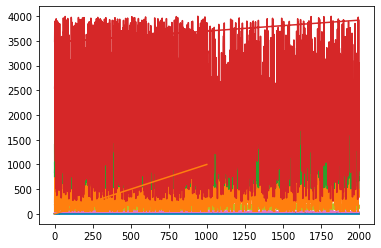

In [ ]:
plt.plot(df)

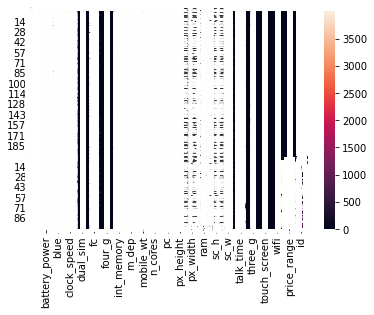

In [ ]:
import seaborn as sns
sns.heatmap(df, annot=True)

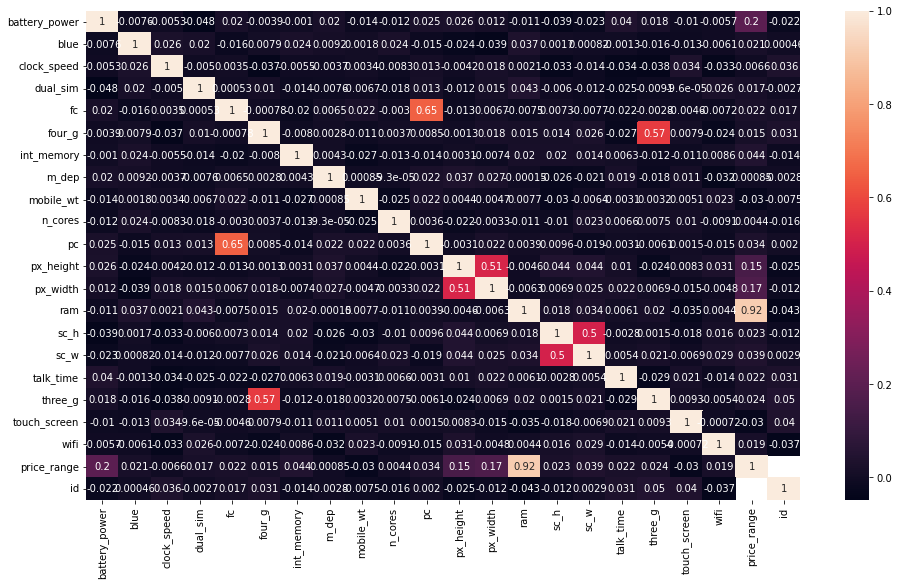

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df_drop = df.drop('id', axis=1)

In [ ]:
df_drop.shape

(3000, 21)

In [ ]:
df = df_drop.dropna()

In [ ]:
df.shape

(2000, 21)

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
Y

0       1.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
1995    0.0
1996    2.0
1997    3.0
1998    0.0
1999    3.0
Name: price_range, Length: 2000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
model_params = {
    'SVM':{
        'model': SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf', 'linear']
        }
    },

    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{}
    },

    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy']
        }
    },

    'MultinomialNB':{
        'model':MultinomialNB(),
        'params':{}
    }

}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores=[]

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

  data = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
data

,model,best_score,best_params
0,SVM,0.972500,"{'C': 10, 'kernel': 'linear'}"
1,RandomForestClassifier,0.868125,{}
2,DecisionTreeClassifier,0.838750,{'criterion': 'entropy'}
3,MultinomialNB,0.512500,{}


In [ ]:
model = SVC(gamma='auto', C=10, kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9775

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm


array([[ 94,   1,   0,   0],
       [  0,  89,   3,   0],
       [  0,   1,  97,   1],
       [  0,   0,   3, 111]])

In [ ]:
mobile=[842,	0,	2.2,	0,	1,	0,	7,	0.6,	188,	2, 2,	20,	756,	2549,	9,	7,	19,	0, 0, 1]

In [ ]:
import numpy as np
mobile = np.array([mobile])

In [ ]:
pred = model.predict(mobile)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1.])

In [ ]:
if pred[0] == 1:
  print("Price Is Low")

elif pred[0] ==2:
  print('Price is Medium')

else:
  print('Price is High')    

Price Is Low
